# Day_04 `Handling Outliers Using Different Methods`

# Import Libraries 

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 


In [10]:
# Load the dataset
df = pd.read_csv('E:\\Data_Sacience\\101-ML_Course\\Day_04\\depressive-disorders-prevalence-vs-gdp-per-capita.csv')
df.head()

,Entity,Code,Year,Depressive disorders (share of population) - Sex: Both - Age: Age-standardized,"GDP per capita, PPP (constant 2017 international $)",Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,Asia
1,Afghanistan,AFG,1990,4.996118,NaN,NaN
2,Afghanistan,AFG,1991,4.989290,NaN,NaN
3,Afghanistan,AFG,1992,4.981346,NaN,NaN
4,Afghanistan,AFG,1993,4.976958,NaN,NaN


In [12]:
# lets check the coloumn name
df.columns

Index(['Entity', 'Code', 'Year',
       'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized',
       'GDP per capita, PPP (constant 2017 international $)', 'Continent'],
      dtype='object')

In [13]:
# check the All Info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7298 entries, 0 to 7297
Data columns (total 6 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Entity                                                                          7298 non-null   object 
 1   Code                                                                            6762 non-null   object 
 2   Year                                                                            7298 non-null   int64  
 3   Depressive disorders (share of population) - Sex: Both - Age: Age-standardized  6420 non-null   float64
 4   GDP per capita, PPP (constant 2017 international $)                             6346 non-null   float64
 5   Continent                                                                       285 non-null    object 
dtypes: float64(2), in

In [31]:
# check the shape
df_shape = df.shape
print(f'The Shape Of data is :{df_shape}')
print("---------------------------------------------------------------------------------------------")

#Check the Null values of the dataset
df_null_values = df.isnull().sum()

print(f'The Null Values Of data is :{df_null_values}')
print("---------------------------------------------------------------------------------------------")

# Checking for duplicates
df_duplicates = df.duplicated().sum()
print(f'The Duplicates values in the data :{df_duplicates}')

The Shape Of data is :(7298, 6)
---------------------------------------------------------------------------------------------
The Null Values Of data is :Entity                                                                               0
Code                                                                               536
Year                                                                                 0
Depressive disorders (share of population) - Sex: Both - Age: Age-standardized     878
GDP per capita, PPP (constant 2017 international $)                                952
Continent                                                                         7013
dtype: int64
---------------------------------------------------------------------------------------------
The Duplicates values in the data :0


In [46]:
# Check the percentage of missing values 
missing_values_percnt = round(df.isnull().mean() * 100)
missing_values_percnt

Entity                                                                             0.0
Code                                                                               0.0
Year                                                                               0.0
Depressive disorders (share of population) - Sex: Both - Age: Age-standardized    12.0
GDP per capita, PPP (constant 2017 international $)                               13.0
Continent                                                                         96.0
dtype: float64

In [48]:
# Fill the missing of code column values using mode
df['Code'].fillna(df['Code'].mode()[0], inplace=True)

# Coloum using Median  fill the deprsion coloumn & GDP coloumn
df['GDP per capita, PPP (constant 2017 international $)'].fillna(df['GDP per capita, PPP (constant 2017 international $)'].median(), inplace=True)
df['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'].fillna(df['Depressive disorders (share of population) - Sex: Both - Age: Age-standardized'].median(), inplace=True)



In [49]:
# Drop the columns Continent becasue its 96 % 
df.drop('Continent', axis=1, inplace=True)

In [56]:
# Check again Missing values 
check_missing_values = df.isnull().sum()
print(check_missing_values)

print('-------------------------------------------------------')

print('There is no missing values now its go to move futher.')

Entity                                                                            0
Code                                                                              0
Year                                                                              0
Depressive disorders (share of population) - Sex: Both - Age: Age-standardized    0
GDP per capita, PPP (constant 2017 international $)                               0
dtype: int64
-------------------------------------------------------
There is no missing values now its go to move futher.


In [58]:
# Change the coloumn name depressive to depressive disorder
df.rename(columns={'Depressive disorders (share of population) - Sex: Both - Age: Age-standardized': 'Depressive disorder'}, inplace=True)
# Also GDP per capita Change 
df.rename(columns={'GDP per capita, PPP (constant 2017 international $)': 'GDP per capita'}, inplace=True)

In [59]:
# Check The Columns Names
df.columns

Index(['Entity', 'Code', 'Year', 'Depressive disorder', 'GDP per capita'], dtype='object')

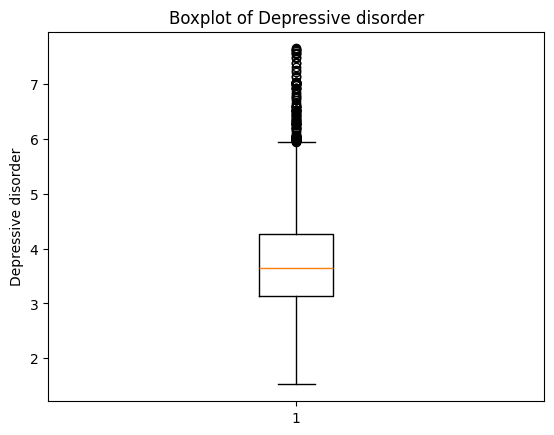

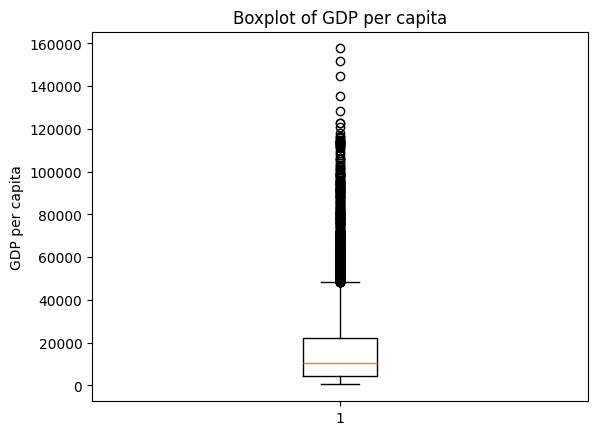

In [60]:
# First Check the outliers using visualizatio boxplot
# Create a boxplot for the 'Depressive disorder' column
plt.boxplot(df['Depressive disorder'])
plt.title('Boxplot of Depressive disorder')
plt.ylabel('Depressive disorder')
plt.show()

# Create a boxplot for the 'GDP per capita' column
plt.boxplot(df['GDP per capita'])
plt.title('Boxplot of GDP per capita')
plt.ylabel('GDP per capita')
plt.show()

# Interpretation 
We See here the boxplots alot of datashow like outliers first we standardize data then further get results.

In [66]:
# We Standardize data using z-score using numpy
mean = np.mean(df['Depressive disorder'])
std = np.std(df['Depressive disorder'])

# Print the results
print("Mean: ", mean)
print("Standard Deviation: ", std)
print("---------------------------------------------------------------")




Mean:  3.751364202000548
Standard Deviation:  0.8688102043697318
---------------------------------------------------------------


,Entity,Code,Year,Depressive disorder,GDP per capita,Z-Score
0,Abkhazia,OWID_ABK,2015,3.636772,10486.2175,-0.131896
1,Afghanistan,AFG,1990,4.996118,10486.2175,1.432711
2,Afghanistan,AFG,1991,4.989290,10486.2175,1.424852
3,Afghanistan,AFG,1992,4.981346,10486.2175,1.415708
4,Afghanistan,AFG,1993,4.976958,10486.2175,1.410658
...,...,...,...,...,...,...
7293,Zimbabwe,ZWE,2017,3.411965,2331.7808,-0.390648
7294,Zimbabwe,ZWE,2018,3.406929,2399.6216,-0.396445
7295,Zimbabwe,ZWE,2019,3.395476,2203.3967,-0.409628
7296,Zimbabwe,ZWE,2020,3.636772,1990.3195,-0.131896


In [84]:

# Calculate the Z-Score
df['Z-Score'] = (df['Depressive disorder'] - mean) / std
df['Z-Score']

0      -0.131896
1       1.432711
2       1.424852
3       1.415708
4       1.410658
          ...   
7293   -0.390648
7294   -0.396445
7295   -0.409628
7296   -0.131896
7297   -0.131896
Name: Z-Score, Length: 7298, dtype: float64

In [67]:
# Step 5: Print the data
print("----------------------------------------")
print(f"Here is the data with outliers:\n {df}")
print("----------------------------------------")


----------------------------------------
Here is the data with outliers:
            Entity      Code  Year  Depressive disorder  GDP per capita  \
0        Abkhazia  OWID_ABK  2015             3.636772      10486.2175   
1     Afghanistan       AFG  1990             4.996118      10486.2175   
2     Afghanistan       AFG  1991             4.989290      10486.2175   
3     Afghanistan       AFG  1992             4.981346      10486.2175   
4     Afghanistan       AFG  1993             4.976958      10486.2175   
...           ...       ...   ...                  ...             ...   
7293     Zimbabwe       ZWE  2017             3.411965       2331.7808   
7294     Zimbabwe       ZWE  2018             3.406929       2399.6216   
7295     Zimbabwe       ZWE  2019             3.395476       2203.3967   
7296     Zimbabwe       ZWE  2020             3.636772       1990.3195   
7297     Zimbabwe       ZWE  2021             3.636772       2115.1445   

       Z-Score  
0    -0.131896  
1  

In [70]:
#  Print the outliers
print(f"Here are the outliers based on the z-score threshold, 3:\n {df[df['Z-Score'] > 3]}")
print("----------------------------------------")

Here are the outliers based on the z-score threshold, 3:
          Entity Code  Year  Depressive disorder  GDP per capita   Z-Score
2572  Greenland  GRL  1990             6.378720      10486.2175  3.024085
2573  Greenland  GRL  1991             6.434176      10486.2175  3.087914
2574  Greenland  GRL  1992             6.476890      10486.2175  3.137078
2575  Greenland  GRL  1993             6.508613      10486.2175  3.173591
2576  Greenland  GRL  1994             6.525027      10486.2175  3.192484
...         ...  ...   ...                  ...             ...       ...
6807     Uganda  UGA  2015             6.579222       2108.8604  3.254862
6808     Uganda  UGA  2016             6.586243       2137.2073  3.262943
6809     Uganda  UGA  2017             6.593235       2128.3970  3.270992
6810     Uganda  UGA  2018             6.591547       2186.9072  3.269049
6811     Uganda  UGA  2019             6.584519       2250.0150  3.260960

[63 rows x 6 columns]
-------------------------------

In [76]:
#  Remove the outliers
data_1 = df[df['Z-Score'] <= 3]

# Print the data without outliers
print(f"Here is the data without outliers:\n {data_1}")

Here is the data without outliers:
            Entity      Code  Year  Depressive disorder  GDP per capita  \
0        Abkhazia  OWID_ABK  2015             3.636772      10486.2175   
1     Afghanistan       AFG  1990             4.996118      10486.2175   
2     Afghanistan       AFG  1991             4.989290      10486.2175   
3     Afghanistan       AFG  1992             4.981346      10486.2175   
4     Afghanistan       AFG  1993             4.976958      10486.2175   
...           ...       ...   ...                  ...             ...   
7293     Zimbabwe       ZWE  2017             3.411965       2331.7808   
7294     Zimbabwe       ZWE  2018             3.406929       2399.6216   
7295     Zimbabwe       ZWE  2019             3.395476       2203.3967   
7296     Zimbabwe       ZWE  2020             3.636772       1990.3195   
7297     Zimbabwe       ZWE  2021             3.636772       2115.1445   

       Z-Score  
0    -0.131896  
1     1.432711  
2     1.424852  
3     1

In [85]:
import pandas as pd
import numpy as np

# Creating a dummy dataset with two columns: 'A' and 'B'
np.random.seed(42)  # Setting seed for reproducibility

# Generating random values for columns 'A' and 'B'
data = {
    'A': np.random.normal(loc=50, scale=10, size=100),  # Random normal distribution for 'A'
    'B': np.random.randint(1, 100, size=100)  # Random integers between 1 and 100 for 'B'
}

# Adding outliers to 'A' column
data['A'][10] = 120  # Adding an outlier at index 10
data['A'][78] = 5    # Adding another outlier at index 78

# Creating a DataFrame from the dictionary
df = pd.DataFrame(data)

# Displaying the first few rows of the dataset
print(df.head())


           A   B
0  54.967142   9
1  48.617357  62
2  56.476885  37
3  65.230299  97
4  47.658466  51


<Axes: >

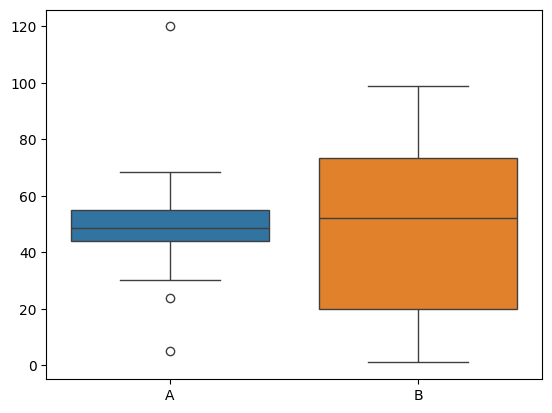

In [86]:
# Plot Boxplot 
sns.boxplot(data=data)

In [89]:
# using Z-score Method to remove outlers 
# We Standardize data using z-score using numpy
mean = np.mean(df['A'])
std = np.std(df['A'])

# Print the results
print("Mean: ", mean)
print("Standard Deviation: ", std)
print("---------------------------------------------------------------")

df['Z-Score'] = (df['A'] - mean) / std
df['Z-Score']

Mean:  49.248700517686764
Standard Deviation:  12.296056379043968
---------------------------------------------------------------


0     0.465063
1    -0.051345
2     0.587846
3     1.299734
4    -0.129329
        ...   
95   -1.129130
96    0.301926
97    0.273409
98    0.065259
99   -0.129682
Name: Z-Score, Length: 100, dtype: float64

In [90]:
print("----------------------------------------")
print(f"Here is the data with outliers:\n {df}")
print("----------------------------------------")


----------------------------------------
Here is the data with outliers:
             A   B   Z-Score
0   54.967142   9  0.465063
1   48.617357  62 -0.051345
2   56.476885  37  0.587846
3   65.230299  97  1.299734
4   47.658466  51 -0.129329
..        ...  ..       ...
95  35.364851  32 -1.129130
96  52.961203   9  0.301926
97  52.610553  99  0.273409
98  50.051135  19  0.065259
99  47.654129  48 -0.129682

[100 rows x 3 columns]
----------------------------------------


In [91]:
#  Print the outliers
print(f"Here are the outliers based on the z-score threshold, 3:\n {df[df['Z-Score'] > 3]}")
print("----------------------------------------")

Here are the outliers based on the z-score threshold, 3:
         A   B   Z-Score
10  120.0  96  5.753983
----------------------------------------


In [96]:
#  Remove the outliers
data_1 = df[df['Z-Score'] <= 3]

# Print the data without outliers
print(f"Here is the data without outliers:\n {data_1}")



Here is the data without outliers:
             A   B   Z-Score
0   54.967142   9  0.465063
1   48.617357  62 -0.051345
2   56.476885  37  0.587846
3   65.230299  97  1.299734
4   47.658466  51 -0.129329
..        ...  ..       ...
95  35.364851  32 -1.129130
96  52.961203   9  0.301926
97  52.610553  99  0.273409
98  50.051135  19  0.065259
99  47.654129  48 -0.129682

[99 rows x 3 columns]


<Axes: >

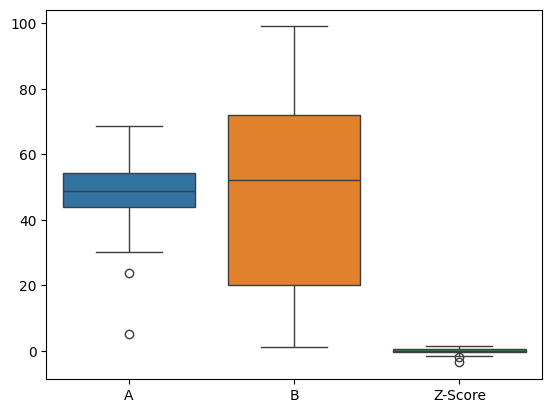

In [97]:
# Now Boxplot Show Data without Outliers
sns.boxplot(data=data_1)

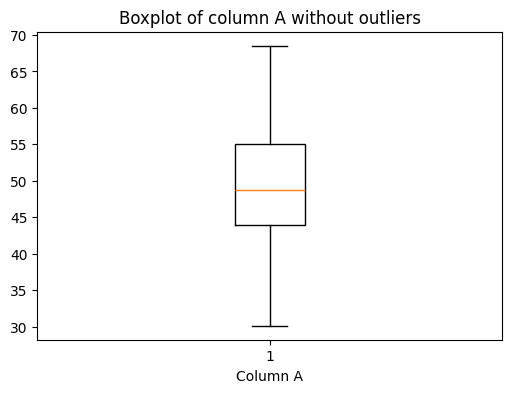

In [100]:
import matplotlib.pyplot as plt

# Creating a boxplot without outliers for column 'A'
plt.figure(figsize=(6, 4))
plt.boxplot(df['A'].dropna(), showfliers=False)
plt.title('Boxplot of column A without outliers')
plt.xlabel('Column A')
plt.show()

# Using Scipy Libaray To Z-Score Method

In [101]:
# Import libraries
import numpy as np
from scipy import stats

# Sample data
data = [2.5, 2.7, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 110.0]

# Calculate the Z-score for each data point
z_scores = np.abs(stats.zscore(data))

# Set a threshold for identifying outliers
threshold = 2.5 
outliers = np.where(z_scores > threshold)[0]

# print the data
print("----------------------------------------")
print("Data:", data)
print("----------------------------------------")

print("Indices of Outliers:", outliers)
print("Outliers:", [data[i] for i in outliers])

# Remove outliers
data = [data[i] for i in range(len(data)) if i not in outliers]
print("----------------------------------------")
print("Data without outliers:", data)

----------------------------------------
Data: [2.5, 2.7, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 110.0]
----------------------------------------
Indices of Outliers: [9]
Outliers: [110.0]
----------------------------------------
Data without outliers: [2.5, 2.7, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0]


<Axes: >

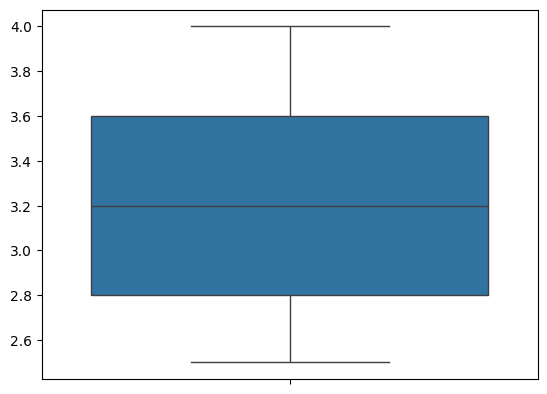

In [102]:
sns.boxplot(data)

# `02 IQR Method to Handle Outliers `

In [104]:
# Step 1: Import the required libraries
import pandas as pd
import numpy as np

# Step 2: Create the data
data = pd.DataFrame({'Age': [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 70,95]})

# Step 3: Calculate the first and third quartile
Q1 = np.percentile(data['Age'], 25, interpolation = 'midpoint')
Q3 = np.percentile(data['Age'], 75, interpolation = 'midpoint')

# Step 4: Calculate the IQR
IQR = Q3 - Q1

# Step 5: Calculate the lower and upper bound
lower_bound = Q1 - (1.5 * IQR)
upper_bound = Q3 + (1.5 * IQR)

# Step 6: Print the data
print("----------------------------------------")
print(f"Here is the data with outliers:\n {data}")
print("----------------------------------------")
# Step 7: Print the outliers
print(f"Here are the outliers based on the IQR threshold:\n {data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)]}")
print("----------------------------------------")
# Step 8: Remove the outliers
data_2 = data[(data['Age'] >= lower_bound) & (data['Age'] <= upper_bound)]

# Step 9: Print the data without outliers
print(f"Here is the data without outliers:\n {data}")

----------------------------------------
Here is the data with outliers:
     Age
0    20
1    21
2    22
3    23
4    24
5    25
6    26
7    27
8    28
9    29
10   30
11   70
12   95
----------------------------------------
Here are the outliers based on the IQR threshold:
     Age
11   70
12   95
----------------------------------------
Here is the data without outliers:
     Age
0    20
1    21
2    22
3    23
4    24
5    25
6    26
7    27
8    28
9    29
10   30
11   70
12   95


<Axes: >

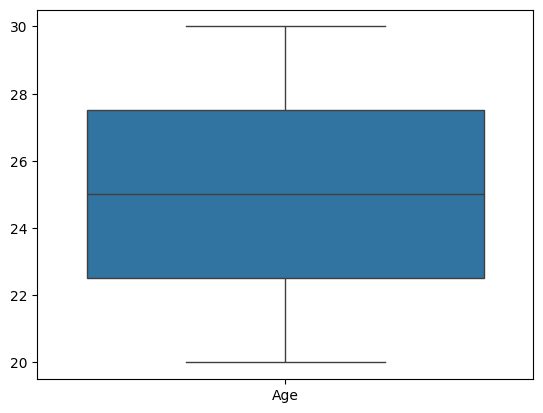

In [105]:
sns.boxplot(data_2)

# `03 K-mean Clustering Method To Handle Outliers`

In [108]:
# Import library
from sklearn.cluster import KMeans

# Sample data
data = [[2, 2], [3, 3], [3, 4], [30, 30], [31, 31], [32, 32]]

# Create a K-means model with two clusters (normal and outlier)
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(data)

# Predict cluster labels
labels = kmeans.predict(data)

# Identify outliers based on cluster labels
outliers = [data[i] for i, label in enumerate(labels) if label == 1]

# print data
print("Data:", data)
print("Outliers:", outliers)
# Remove outliers
data_4 = [data[i] for i, label in enumerate(labels) if label == 0]
print("Data without outliers:", data)

Data: [[2, 2], [3, 3], [3, 4], [30, 30], [31, 31], [32, 32]]
Outliers: [[2, 2], [3, 3], [3, 4]]
Data without outliers: [[2, 2], [3, 3], [3, 4], [30, 30], [31, 31], [32, 32]]


<Axes: >

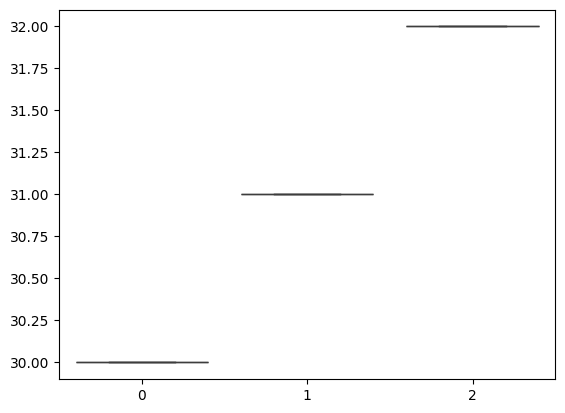

In [109]:
sns.boxplot(data_4)